# Skin Cancer Detection
### By Team Machine Minds
#### Team Members
- Shyamron Dongol
- Anjan Khadka
- Anish Shilpakar
- Sudip Shrestha
#### Dataset Used:
[ISIC skin cancer image dataset labelled](https://www.kaggle.com/datasets/riyaelizashaju/isic-skin-disease-image-dataset-labelled)  
**Source:** Kaggle.com
#### Disease Categories:
This dataset is to facilitate image classification for 8 skin diseases:
1. Actinic keratosis
2. Basal cell carcinoma
3. Benign keratosis
4. Dermatofibroma
5. Melanocytic nevus
6. Melanoma
7. Squamous cell carcinoma
8. Vascular lesion
#### Tools and Technology Used: 
- **Model:** Resnet 152  
- **Programming Language:** Python
- **Deep Learning Framework:** Fast.ai


#### Methodology
- Initially we tried training with the original dataset but it resulted in poor f1 score as the dataset was highly imbalanced
- Then we tried undersampling all the classes to ~200 samples i-e no of samples in minority class. Much improvements weren't seen during undersampling
- Finally we performed data augmentation and downsampling to ~ 1000 samples in each class. Some improvements were seen in f1 score

## Data Augmentation Section

The four classes 'Actinic keratosis', 'Squamous cell carcinoma','Vascular lesion','Dermatofibroma' had less than 1000 images so these were upsampled to ~1000 images using image augmentation techniques  
The remaining 4 classes had more than 1000 samples so we only considered subset of these dataset so that all classes are balanced during training

For image augmentation, we performed the following 3 steps:
1. Rotation by 90 degrees
2. Rotation by 270 degress
3. Flipping images i-e mirroring in Y-axis

In [ ]:
import os
from os import listdir
from PIL import Image
import shutil
import random

def double_data(src,dst):
    files = os.listdir(src)
    for file in files:
        val = random.choice([90, 270])
        img = Image.open(src+"/"+file)
        img.save(dst+"/"+file)
        img = img.rotate(val,expand = True)
        img.save(dst+"/"+file.split(".")[0]+"_rot.jpg")


def upsample_200(src,dst):
    files = os.listdir(src)
    for i,file in enumerate(files):
        if i<200:
            val = random.choice([90, 270])
            img = Image.open(src+"/"+file)
            img.save(dst+"/"+file)
            img = img.rotate(val,expand = True)
            img.save(dst+"/"+file.split(".")[0]+"_rot.jpg")
        else:
            shutil.copy(src+"/"+file,dst+"/"+file)
            
def limit_to_1200(src,dst):
    files = os.listdir(src)
    for i,file in enumerate(files):
        if i>1200:
            break
        shutil.copy(src+"/"+file,dst+"/"+file)


def times_four_data(src,dst):
    files = os.listdir(src)
    for file in files:
#         val = random.choice([True, False])
        img = Image.open(f"{src}/{file}")
        img.save(dst+"/"+file)
        img1 = img.rotate(90,expand = True)
        img1.save(dst+"/"+file.split(".")[0]+"_90.jpg")
        img2 = img.rotate(270,expand = True)
        img2.save(dst+"/"+str(file.split(".")[0])+"_270.jpg")
        
#         if val:
#         img3 = img.mirror()
        img3= img.transpose(Image.FLIP_LEFT_RIGHT)
        img3.save(dst+"/"+str(file.split(".")[0])+"_mir.jpg")
#         else:
#             img3 = img.flip()
#             img3.save(dst+"/"+str(file.split(".")[0])+"_flp.jpg")

        

# folder = "/kaggle/input/isic-skin-disease-image-dataset-labelled/ISIC_Labelled/Melanoma"
# save_dir = "/kaggle/working/ISIC_1000"
# generate_more_data(folder,3,save_dir)

In [ ]:
!mkdir "/kaggle/working/ISIC_1000/Melanoma"

In [ ]:
!ls /kaggle/input/isic-skin-disease-image-dataset-labelled/ISIC_Labelled/

In [ ]:
in_path = "/kaggle/input/isic-skin-disease-image-dataset-labelled/ISIC_Labelled/"
out_path = "/kaggle/working/ISIC_1000/"
upsample_200(in_path+"Actinic keratosis",out_path+"Actinic keratosis")
limit_to_1200(in_path+"Basal cell carcinoma",out_path+"Basal cell carcinoma")
limit_to_1200(in_path+"Benign keratosis",out_path+"Benign keratosis")
times_four_data(in_path+"Dermatofibroma",out_path+"Dermatofibroma")
limit_to_1200(in_path+"Melanocytic nevus",out_path+"Melanocytic nevus")
limit_to_1200(in_path+"Melanoma",out_path+"Melanoma")
double_data(in_path+"Squamous cell carcinoma",out_path+"Squamous cell carcinoma")
times_four_data(in_path+"Vascular lesion",out_path+"Vascular lesion")

In [ ]:
import shutil
shutil.make_archive("dataset_1200.zip", 'zip',"/kaggle/working/ISIC_1000")

In [ ]:
import shutil
shutil.make_archive("dataset_1200", 'zip',"/kaggle/working/ISIC_1000")

In [ ]:
from IPython.display import FileLink
FileLink(r'dataset_1200.zip')

## Model Training Section

Necessary imports

In [6]:
import numpy as np
import pandas as pd
import os
from fastai.vision.all import *

Creating dataset.csv and labels.csv based on the images dataset

In [13]:
folders  = os.listdir()
folders.sort()
print(folders)
df_list = []
labels_list = []
for i,classes in enumerate(folders):
  labels_list.append([classes,i])
  files = os.listdir(classes)
  for items in files:
    df_list.append([classes+"/"+items,i])

df = pd.DataFrame(df_list,index = None, columns = ['image_id','label'])
df.to_csv('/content/drive/MyDrive/SkinDisease/dataset.csv',index = False)

df2 = pd.DataFrame(labels_list,index = None, columns = ['class_name','label'])
df2.to_csv('/content/drive/MyDrive/SkinDisease/labels.csv',index = False)

print(df.head())

print(df2.head())

['Actinic keratosis', 'Basal cell carcinoma', 'Benign keratosis', 'Dermatofibroma', 'Melanocytic nevus', 'Melanoma', 'Squamous cell carcinoma', 'Vascular lesion']
                             image_id  label
0  Actinic keratosis/ISIC_0031430.jpg      0
1  Actinic keratosis/ISIC_0069932.jpg      0
2  Actinic keratosis/ISIC_0065470.jpg      0
3  Actinic keratosis/ISIC_0058452.jpg      0
4  Actinic keratosis/ISIC_0064969.jpg      0
             class_name  label
0     Actinic keratosis      0
1  Basal cell carcinoma      1
2      Benign keratosis      2
3        Dermatofibroma      3
4     Melanocytic nevus      4


In [ ]:
path = '/content/Dataset/'
os.listdir(path)

['ISIC_Labelled', 'dataset.csv', 'labels.csv']

Reading csv files

In [14]:
train = pd.read_csv("/content/drive/MyDrive/SkinDisease/dataset.csv")
train.head()

,image_id,label
0,Actinic keratosis/ISIC_0031430.jpg,0
1,Actinic keratosis/ISIC_0069932.jpg,0
2,Actinic keratosis/ISIC_0065470.jpg,0
3,Actinic keratosis/ISIC_0058452.jpg,0
4,Actinic keratosis/ISIC_0064969.jpg,0


In [15]:
train['image_id'] = "/content/Dataset/" + train['image_id'] 
train.head()

,image_id,label
0,/content/Dataset/Actinic keratosis/ISIC_0031430.jpg,0
1,/content/Dataset/Actinic keratosis/ISIC_0069932.jpg,0
2,/content/Dataset/Actinic keratosis/ISIC_0065470.jpg,0
3,/content/Dataset/Actinic keratosis/ISIC_0058452.jpg,0
4,/content/Dataset/Actinic keratosis/ISIC_0064969.jpg,0


Creating datablock object from csv file  
- We have used RandomSplitter for splitting training and validation datasets with validation percentage of 20% i-e split ratio is 80% training and 20% validation  
- We performed item level transforms on input data to resize image to 128 pixels
- Also, we performed bathc level transforms to the input data i-e we applied a random resized crop of size 224 pixels using GPU. Also, we performed augmentation transforms and normalized image using statistics from the ImageNet dataset.

In [16]:
def get_x(row): return row['image_id']
def get_y(row): return row['label']

db = DataBlock(blocks = (ImageBlock, CategoryBlock),
              get_x = get_x,
               get_y = get_y,
               splitter = RandomSplitter(valid_pct = 0.2),
               item_tfms = [Resize(128)],
               batch_tfms = [RandomResizedCropGPU(224), *aug_transforms(), 
                            Normalize.from_stats(*imagenet_stats)]            
              )

Creating DataLoader for the training dataset using the previously defined DataBlock.  
Here we have set batch size to 8 considering limited GPU and RAM in colab

In [17]:
dls = db.dataloaders(train, bs = 8)

Displaying a sample of the data contained in DataLoader object stored in dls.  
We are displaying a random batch of data using the show_batch method of DataLoader object

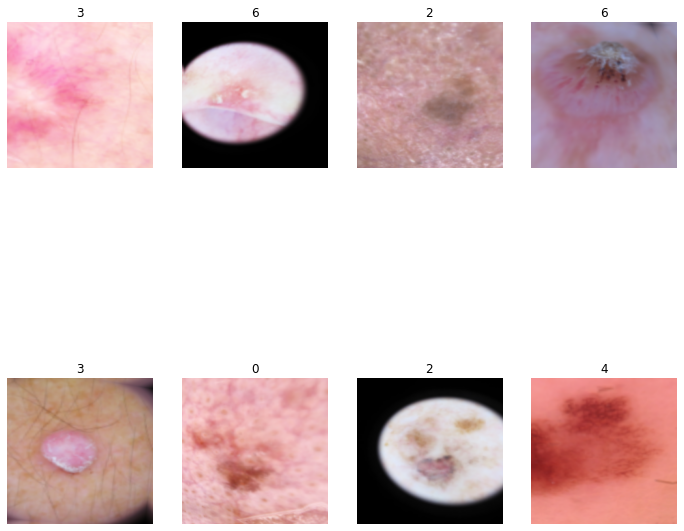

In [18]:
dls.show_batch(figsize = (12,12))

Copying the pretrained model to checkpoints folder 

In [19]:
if not os.path.exists('/root/.cache/torch/hub/checkpoints/'):
        os.makedirs('/root/.cache/torch/hub/checkpoints/')
!cp '/content/drive/MyDrive/SkinDisease/resnet152.pth' '/root/.cache/torch/hub/checkpoints/resnet152-b121ed2d.pth'

Creating a Learner object using vision_learner from fastai library.
- Here we specify various parameters like:
    - DataLoader object for training and validation data
    - Pretrained model: resnet152
    - Optimization function: ranger (Other optimizers like Adam, SGD were also tried)
    - Loss Function: Label Smoothing Cross Entropy
    - Metrics: accuracy

In [33]:
learn = vision_learner(dls, resnet152, opt_func=ranger, loss_func=LabelSmoothingCrossEntropy(), metrics=accuracy)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Finetuning the pretrained model using Learner object and our own custom dataset
- Here we have trained for 30 epochs
- Also, we trained for 5 epochs keeping the pretrained weights frozen

In [34]:
learn.fine_tune(30, freeze_epochs = 5)

epoch,train_loss,valid_loss,accuracy,time
0,3.105141,2.105704,0.293750,00:47
1,2.761510,2.124803,0.368750,00:46
2,2.630696,2.104877,0.393750,00:45
3,2.430609,2.224254,0.381250,00:45
4,2.352525,1.927955,0.434375,00:45


epoch,train_loss,valid_loss,accuracy,time
0,2.054637,1.791001,0.481250,00:54
1,1.984069,1.812740,0.406250,00:53
2,1.915205,1.722945,0.487500,00:54
3,1.937858,1.740339,0.478125,00:57
4,1.864288,1.550544,0.534375,00:53
5,1.880582,1.623616,0.468750,00:54
6,1.841365,1.565620,0.500000,00:54
7,1.836383,1.617148,0.515625,00:54
8,1.783035,1.650591,0.496875,00:54
9,1.670488,1.645077,0.453125,00:58


Save the model's state and optimizer's state in file named resnet152

In [35]:
%cd /content/
learn.save('resnet152')

/content


Path('models/resnet152.pth')

In [36]:
!cp /content/models/resnet152.pth /content/drive/MyDrive/trained_models/resnet152_30.pth

In [25]:
!mkdir /content/drive/MyDrive/trained_models

Analyzing the performance of a classification model

In [37]:
interp = ClassificationInterpretation.from_learner(learn)

Plotting the confusion matrix

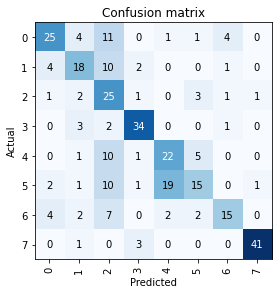

In [38]:
interp.plot_confusion_matrix()

Testing

In [ ]:
# sample = pd.read_csv(path/'sample_submission.csv')

# lst = [['/content/drive/MyDrive/Dataset/ISIC_Labelled/Actinic keratosis/ISIC_0071609.jpg',0]]
# lst = [['/content/drive/MyDrive/Dataset/ISIC_Labelled/Basal cell carcinoma/ISIC_0024331.jpg',1]]
# lst = [['/content/drive/MyDrive/Dataset/ISIC_Labelled/Benign keratosis/ISIC_0012103_downsampled.jpg',2]]
# lst = [['/content/drive/MyDrive/Dataset/ISIC_Labelled/Dermatofibroma/ISIC_0054915.jpg',3]]
# lst = [['/content/drive/MyDrive/Dataset/ISIC_Labelled/Melanocytic nevus/ISIC_0034088.jpg',4]]
# lst = [['/content/drive/MyDrive/Dataset/ISIC_Labelled/Melanoma/ISIC_0026531.jpg',5]]
# lst = [['/content/ISIC_Labelled/Squamous cell carcinoma/ISIC_0025411.jpg',6]]
lst = [['/content/ISIC_Labelled/Vascular lesion/ISIC_0024706.jpg',7]]




sample = pd.DataFrame(lst, columns = ['image_id','label'])

In [ ]:
_sample = sample.copy()
# _sample['image_id'] = _sample['image_id'].map(lambda x:path/'test_images'/x)
test_dl = dls.test_dl(_sample)

In [ ]:
_sample.head()

,image_id,label
0,/content/ISIC_Labelled/Vascular lesion/ISIC_0024706.jpg,7


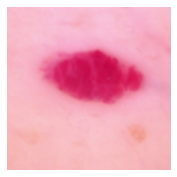

In [ ]:
test_dl.show_batch()

In [ ]:
preds, _ = learn.tta(dl=test_dl, n=8, beta=0)

In [ ]:
sample['label'] = preds.argmax(dim=-1).numpy()

In [ ]:
sample.head()

,image_id,label
0,/content/ISIC_Labelled/Vascular lesion/ISIC_0024706.jpg,7


In [ ]:
sample.to_csv('submission.csv',index=False)

In [ ]:
!ls "/content/drive/MyDrive/Dataset/ISIC_Labelled/Squamous cell carcinoma/"